practical Statistic for Data Science
Chapter 1

In [23]:
import pandas as pd


In [24]:
medal_count = pd.read_excel('./dataset/Medals.xlsx')
medal_count

/home/anish/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [25]:
medal_count['Total'].mean()

11.612903225806452

In [26]:
import numpy as np
np.average(medal_count['Total'],weights=medal_count['Gold']) #weighted mean

46.832352941176474

In [27]:
#trimmed mean
from scipy.stats import trim_mean
trim_mean(medal_count['Total'],0.1) #exclude 10% of top

6.8933333333333335

In [28]:
#median
medal_count['Total'].median()

4.0

In [29]:
#weighted median
def weighted_median(df, median_col,weight_col):
    df_sorted =df.sort_values(median_col)   
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum>=cutoff][median_col].iloc[0]

weighted_median(medal_count,'Total','Gold')

40

In [30]:
#percentile
q3 = np.percentile(medal_count['Total'],75)
q3

11.0

##Estimates of Variability(Dispersion Metric)

In [31]:


#variance
from statistics import  variance
variance(medal_count['Gold'])

49.315100514259

In [32]:
#standard Deviation
import math
from statistics import stdev
stdev(medal_count['Gold']) #square root of variance is stdev

7.022471111671375

In [33]:
#mean absolute deviation
from numpy import mean, absolute
mean(absolute(medal_count['Gold']-mean(medal_count['Gold'])))

4.0048560527228565

In [34]:
#median Absolute Deviation
from numpy import median, absolute
median(absolute(medal_count['Gold']-median(medal_count['Gold'])))

1.0

In [35]:
#inter quartrile range
q3, q1 =np.percentile(medal_count['Gold'],[75,25])
iqr = q3-q1
iqr

3.0

#Exploring Data Distributions

In [36]:
#Box plot
medal_count.boxplot(column='Gold',by=None,ax=None)

<Axes: >

In [37]:
#frequency table
frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count["Gold"],10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


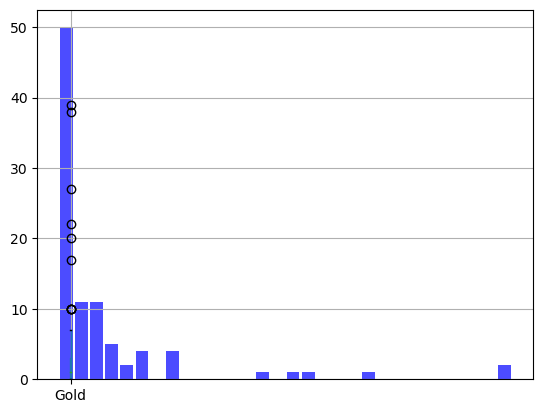

In [38]:
#histogram
import matplotlib.pyplot as plt
plt.hist(x=medal_count["Gold"],bins='auto',color='blue',alpha=0.7,rwidth=0.85)
plt.show()

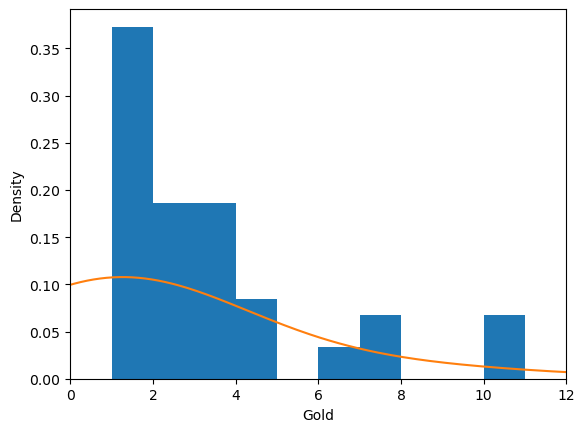

In [39]:
#density plot
ax = medal_count["Gold"].plot.hist(density = True,xlim=[0,12],bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel('Gold')
plt.show()

#Exploring binary and Categorical Data

In [40]:
#mode
medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64